# TP - Comparez le comportement du lasso et de la régression ridge

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [57]:
raw_data = pd.read_csv('prostate.data.txt', delimiter='\t')

In [58]:
raw_data.head()

col    lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45  \
0    1 -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0   
1    2 -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0   
2    3 -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20   
3    4 -1.203973  3.282789   58 -1.386294    0 -1.386294        6      0   
4    5  0.751416  3.432373   62 -1.386294    0 -1.386294        6      0   

       lpsa train  
0 -0.430783     T  
1 -0.162519     T  
2 -0.162519     T  
3 -0.162519     T  
4  0.371564     T

In [59]:
# Les colonnes d'entrée sont celles qui décrivent le patient et la colonne de sortie est son taux de LPSA
X = raw_data.iloc[:,1:-3]
y = raw_data.iloc[:,-2]

In [60]:
# Standardisation de nos features
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [61]:
# Séparation du dataset en training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)
X_train.shape

(72, 7)

In [62]:
# On crée la régression linéaire
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [63]:
# Calcul des performances de la régression linéaire (erreur quadratique)
baseline_error = np.mean((lr.predict(X_test) - y_test) ** 2)
print(baseline_error)

0.5224140702812581


In [64]:
# Test des autres régressions linéaires (Ridge et Lasso)
n_alphas = 50

# Les alphas sont pris sur une échelle logarithmique
alphas = np.logspace(-5, 5, n_alphas)

ridge = linear_model.Ridge()

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append(np.mean((ridge.predict(X_test) - y_test) ** 2))

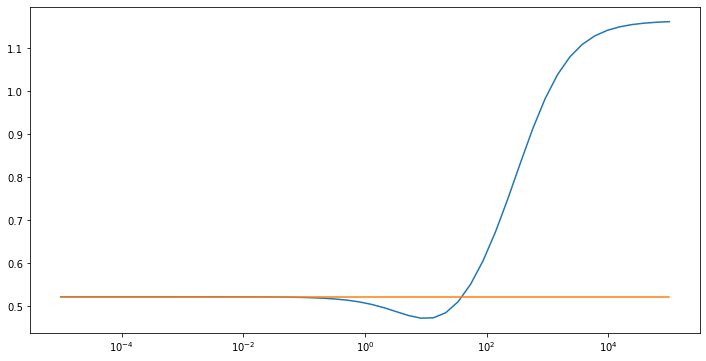

In [65]:
# On trace l'évolution de l'erreur en fonction de alpha et on compare à l'erreur de base faite par la régression linéaire classique
plt.figure(figsize=(12,6))
ax = plt.gca()
ax.plot(alphas, errors, [10**-5, 10**5], [baseline_error, baseline_error])
ax.set_xscale('log')
plt.show()

In [66]:
print(np.argmin(errors))
print(errors[np.argmin(errors)])
print(alphas[np.argmin(errors)])

29
0.4726480392279798
8.286427728546842


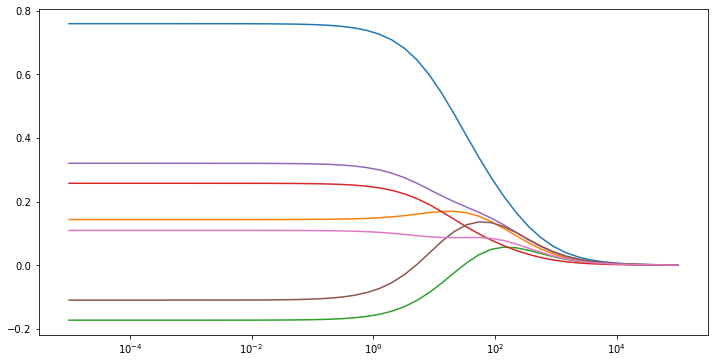

In [67]:
plt.figure(figsize=(12,6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.show()

## Lasso

In [68]:
n_alphas = 50
alphas = np.logspace(-5, 5, n_alphas)

lasso = linear_model.Lasso()

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append(np.mean((lasso.predict(X_test) - y_test) ** 2))

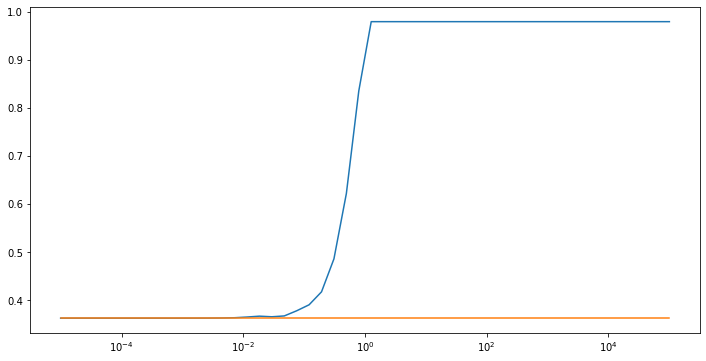

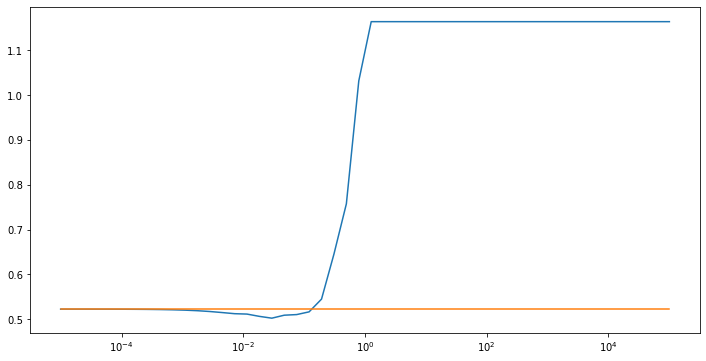

In [69]:
plt.figure(figsize=(12,6))
ax = plt.gca()
ax.plot(alphas, errors, [10**-5, 10**5], [baseline_error, baseline_error])
ax.set_xscale('log')
plt.show()

In [73]:
print(np.argmin(errors))
print(errors[np.argmin(errors)])
print(alphas[np.argmin(errors)])

17
0.5022246601346757
0.029470517025518096


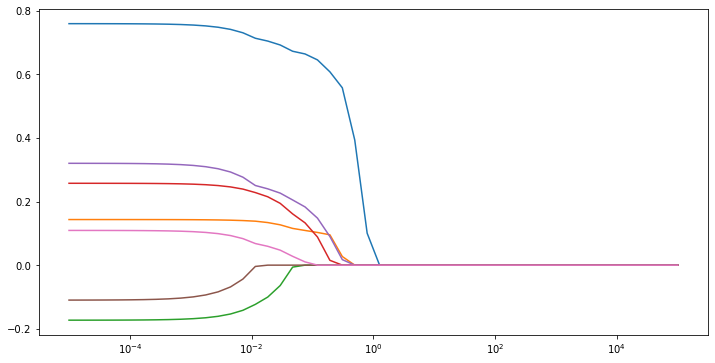

In [72]:
plt.figure(figsize=(12,6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.show()

In [78]:
X = np.matrix([-0.78768, -1.51760513, 0.74416271, -0.62288928])
y = np.matrix([-34.59703199, -30.79543532, 19.31018182, -19.44809959])

In [85]:
(np.linalg.inv(X.T*X))*(X.T)*y

matrix([[ 380.56735189,  338.74978852, -212.41200002,  213.92909549],
        [-138.38812796, -123.18174128,   77.24072728,  -77.79239836],
        [ 276.77625592,  246.36348256, -154.48145456,  155.58479672],
        [  34.59703199,   30.79543532,  -19.31018182,   19.44809959]])